In [1]:
%matplotlib widget
import zarr_fuse as zf
import ipympl

# Import necessary libraries
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
#import contextily as ctx
#import pyproj
import numpy as np

Removing inconsistent TZ codes: {'CST', '-02', 'IST', '-04', '+12', '-03', 'CDT', '+13', '+07', 'AEST', '+0430', '+05', '-06', 'EAT', '+10', 'WAT', '+06', '+11', '+08', 'PST', 'ACST', '+09', '+04'}


In [2]:
from hlavo_surface import inputs
work_dir = inputs.work_dir


#root_node = zf.Node.read_store(work_dir / "surface.zarr")

from dotenv import load_dotenv
from pathlib import Path
path = Path("../secrets.env").absolute()
print("Loading env file: ", path)
load_dotenv(path)  # or Path("secrets.env")

root_node = zf.open_store(inputs.surface_schema_yaml, workdir=work_dir)

# Configuration of the polts which variables/fields to show.
fields = {
    'yr.no': ['air_temperature', 'precipitation_amount', 'relative_humidity']
}


#df_temp = root_node['yr.no'].read_df("air_temperature", date_time=slice(None))
#print(df_temp)
print(root_node['yr.no'].dataset.coords['date_time'])

Loading env file:  /home/jb/workspace/zarr_fuse/app/hlavo_surface/notebooks/../secrets.env
<xarray.DataArray 'date_time' (date_time: 396)> Size: 3kB
array(['2025-09-02T11:00:00.000000000', '2025-09-02T12:00:00.000000000',
       '2025-09-02T13:00:00.000000000', ..., '2025-11-27T00:00:00.000000000',
       '2025-11-27T06:00:00.000000000', '2025-11-27T12:00:00.000000000'],
      shape=(396,), dtype='datetime64[ns]')
Coordinates:
  * date_time  (date_time) datetime64[ns] 3kB 2025-09-02T11:00:00 ... 2025-11...
Attributes:
    composed:     ['date_time']
    description:  \n\nNone
    chunk_size:   1024


Coord: date_time, ('date_time',)
Coord: lat_lon, ('lat_lon',)
Read DF: ['air_temperature', 'precipitation_amount', 'relative_humidity'], dimss: {'latitude', 'date_time', 'longitude'}
35640


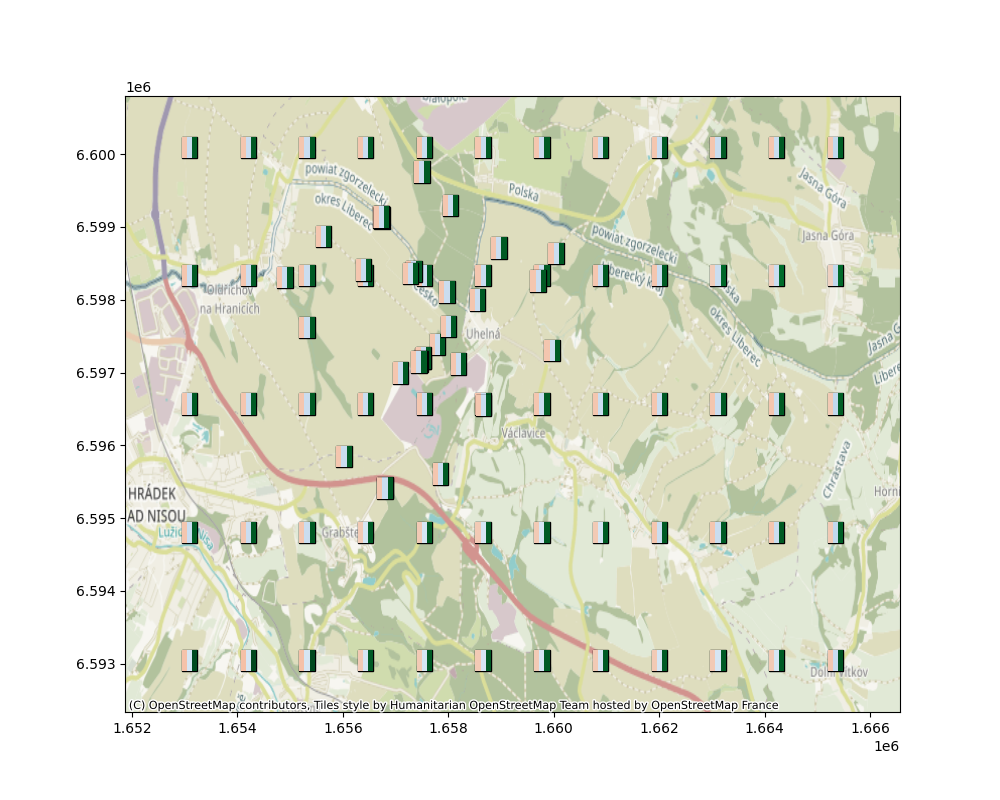

In [3]:
import matplotlib.pyplot as plt
# Create an instance of the InteractiveMapPlotter
node_path = 'yr.no'
node = root_node[node_path]
ds = node.dataset
overview = zf.plot.build_overview(root_node)
full_coords = overview[node_path].cumul_coordinates
mid_date_time = full_coords['date_time'].quantile(
            0.5,                     # 50 % quantile = median
            method="nearest"         # or "linear", "midpoint", …
).item() 
#print(mid_date_time)

mid_lat_lon = full_coords['lat_lon'][0]
point_ds = ds.sel(lat_lon=mid_lat_lon)

handlers = []
data_selector = {
    'date_time': 'time_axis',
    'longitude': 'lon_axis',
    'latitude': 'lat_axis',
    'air_temperature': plt.cm.coolwarm,  # Temperature: cool-to-warm colors
    'precipitation_amount': plt.cm.Blues,  # Precipitation: blues
    'relative_humidity': plt.cm.Greens,  # Humidity: greens
    #'wind_speed': plt.cm.Oranges,  # Wind speed: oranges
    #'insol': plt.cm.YlOrBr  # Insolation: yellow-orange-brown

    'time_point': None,
    'lon_point': None,
    'lat_point': None
}

df = node.read_df(fields[node_path], date_time=slice(None))
print(len(df))
plotter = zf.plot.InteractiveMapPlotter(df, data_selector, handlers)

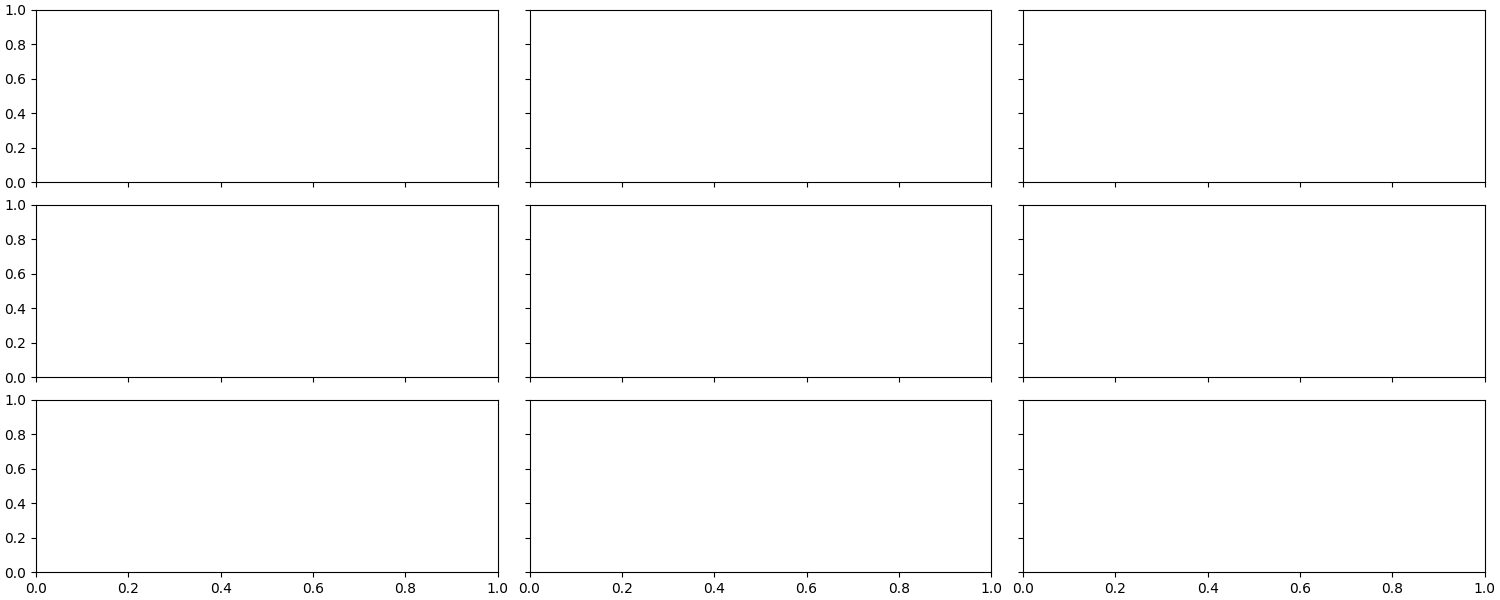

In [4]:

zf.plot.MultiZoomer(df, data_selector, handlers)
jupy-en